<h1>  CREDIT CARD FRAUD DETECTION </h1>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from xgboost import XGBClassifier


In [6]:
# Load the dataset
url = "Add Input File
data = pd.read_csv(url)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [54]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,LogAmount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,3.152188
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,1.656648
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,1.887070
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,3.135494
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,4.358822
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,10.153941


In [52]:
# Step 1: Data Preprocessing
# Check for missing values
print(data.isnull().sum().max())


0


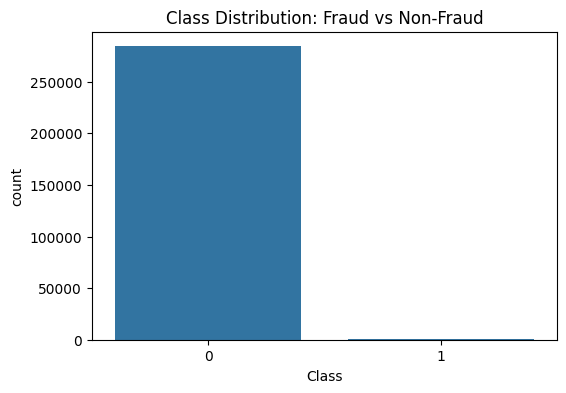

In [11]:
# Step 2: Exploratory Data Analysis (EDA)
# Plot the distribution of the 'Class' column to check the imbalance of classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.show()


<h5>This plot shows the class distribution for fraud detection, highlighting a significant imbalance. Non-fraudulent transactions (Class 0) dominate the dataset with over 250,000 instances, while fraudulent transactions (Class 1) are very few, indicating a typical imbalanced dataset challenge.</h5>

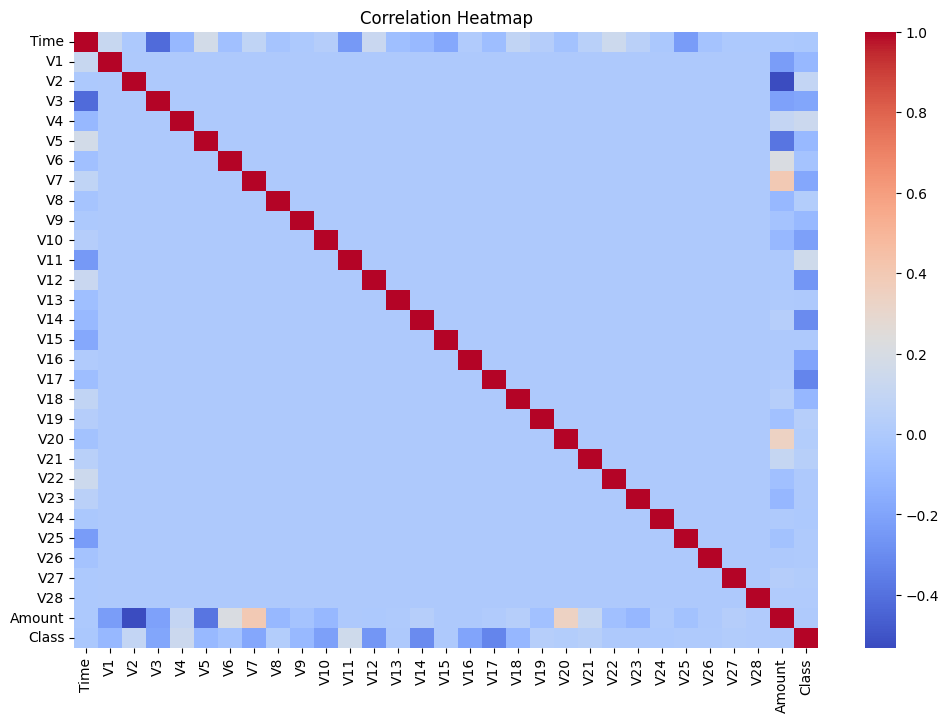

In [12]:
# Correlation heatmap for feature understanding
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


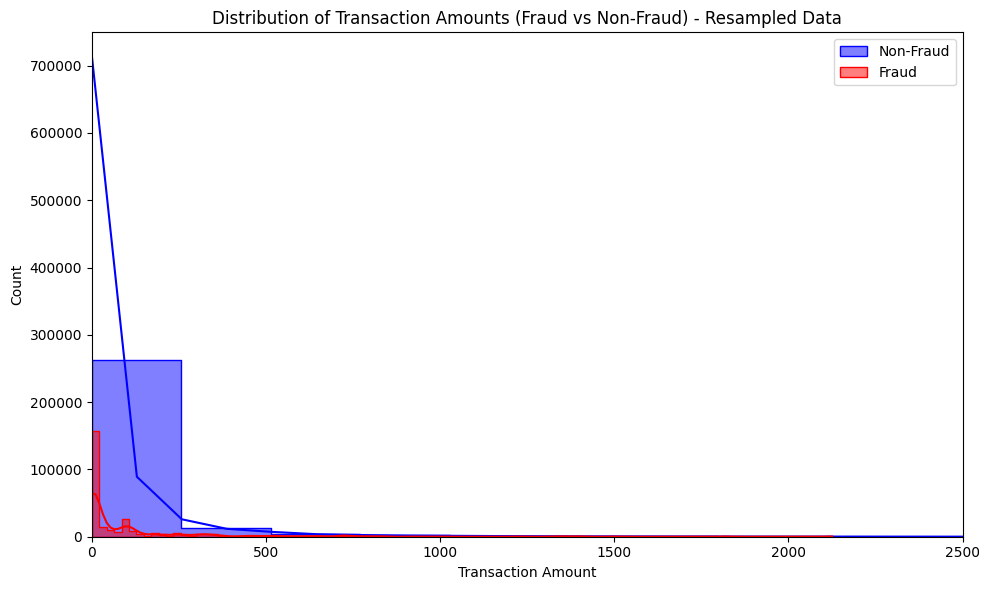

In [50]:
from sklearn.utils import resample

# Separate the majority (non-fraud) and minority (fraud) classes
non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

# Resample the fraud class to match the non-fraud class size
fraud_upsampled = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)

# Combine the upsampled fraud data with the non-fraud data
df_resampled = pd.concat([non_fraud, fraud_upsampled])

# Visualize the resampled data
plt.figure(figsize=(10, 6))

sns.histplot(df_resampled[df_resampled['Class'] == 0]['Amount'], bins=100, color='blue', label='Non-Fraud', kde=True, element="step")
sns.histplot(df_resampled[df_resampled['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', kde=True, element="step")

plt.title('Distribution of Transaction Amounts (Fraud vs Non-Fraud) - Resampled Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.xlim(0, 2500)
plt.legend()
plt.tight_layout()

plt.show()


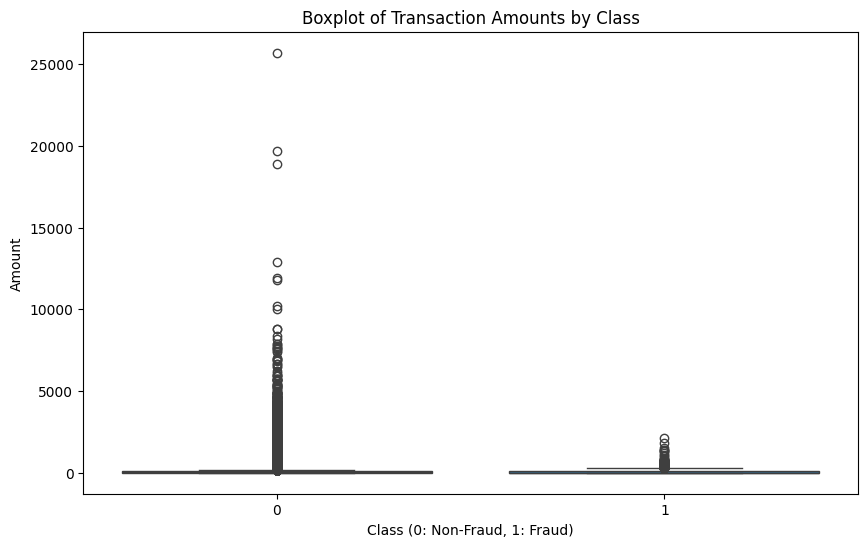

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Transaction Amounts by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.show()


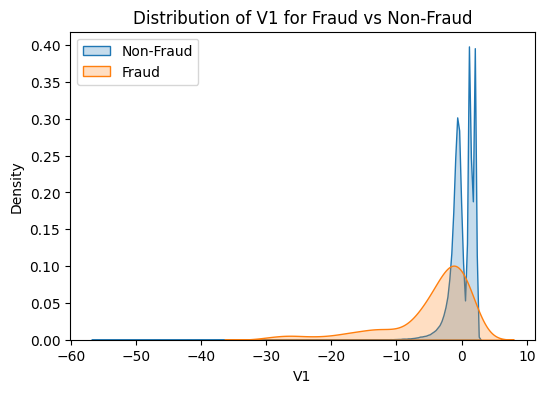

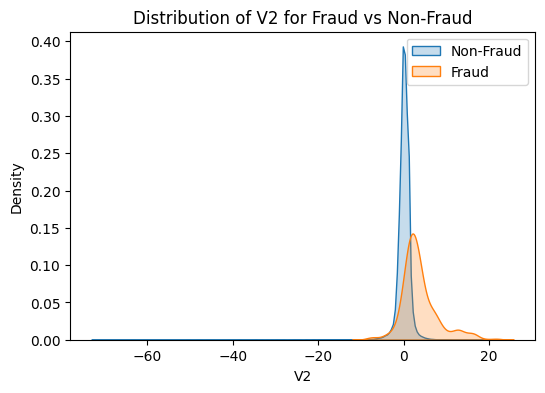

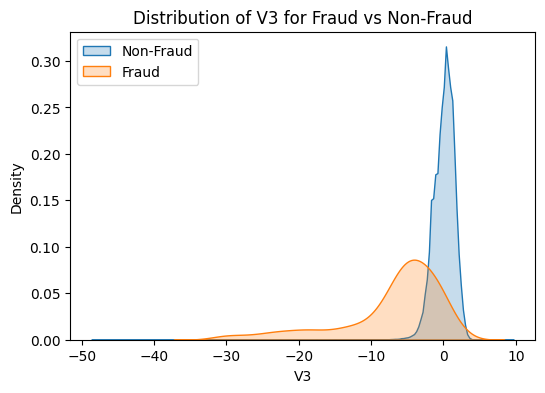

In [15]:
# Visualizing distributions of key features for fraud vs non-fraud transactions
# Assuming V1, V2, ... are feature names in the dataset
for feature in ['V1', 'V2', 'V3']:  # Replace with important features in your dataset
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data[data['Class'] == 0][feature], label='Non-Fraud', fill=True)
    sns.kdeplot(data[data['Class'] == 1][feature], label='Fraud', fill=True)
    plt.title(f'Distribution of {feature} for Fraud vs Non-Fraud')
    plt.legend()
    plt.show()


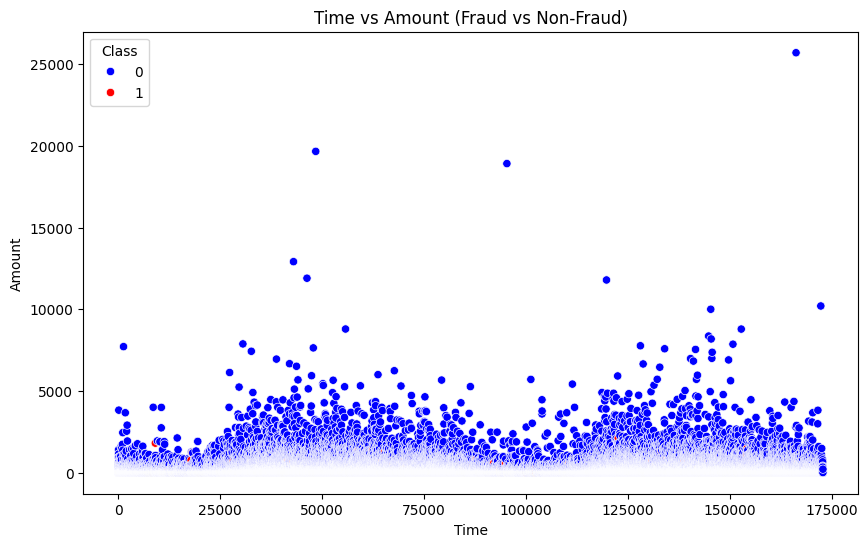

In [26]:
# Time vs Amount for Fraud and Non-Fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, palette={0: 'blue', 1: 'red'})
plt.title('Time vs Amount (Fraud vs Non-Fraud)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


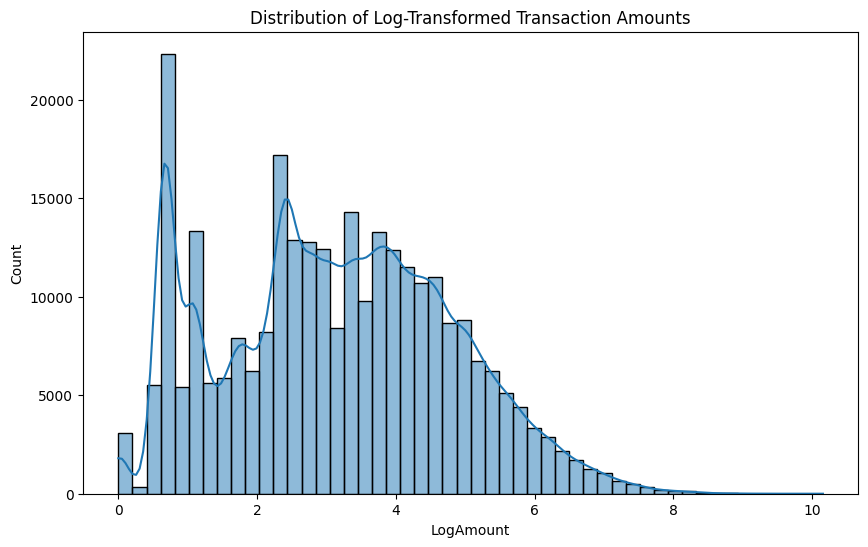

In [27]:
# Log-transform Amount feature for better visualization
data['LogAmount'] = np.log1p(data['Amount'])

plt.figure(figsize=(10, 6))
sns.histplot(data['LogAmount'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Transaction Amounts')
plt.show()


In [89]:
# Step 3: Data Preparation
# Separate the features (X) and the target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Handling Class Imbalance using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Combine the resampled X and y into a new DataFrame
new_df = pd.concat([X_resampled_df, pd.Series(y_resampled, name='Class')], axis=1)
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
# Step 4: Model Building using XGBoost
xgb_model = XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.05, random_state=42, eval_metric='auc')
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

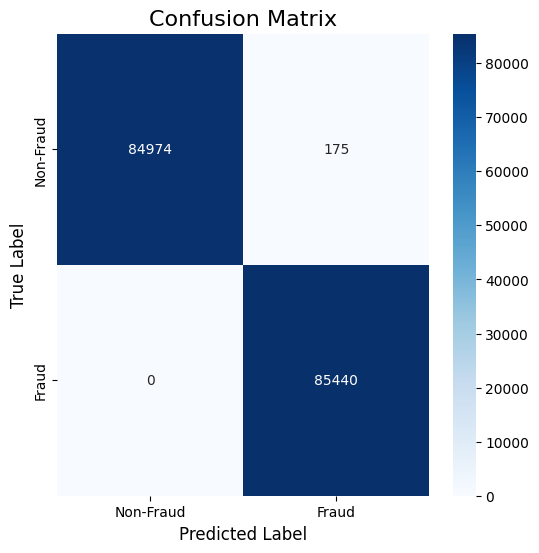

In [82]:
def plot_confusion_matrix(y_test, y_pred):
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
                xticklabels=['Non-Fraud', 'Fraud'], 
                yticklabels=['Non-Fraud', 'Fraud'])
    
    # Add titles and labels
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()

# Call the function to plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

In [83]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Accuracy Score: 0.998974142529706
ROC AUC Score: 0.9999808718209451


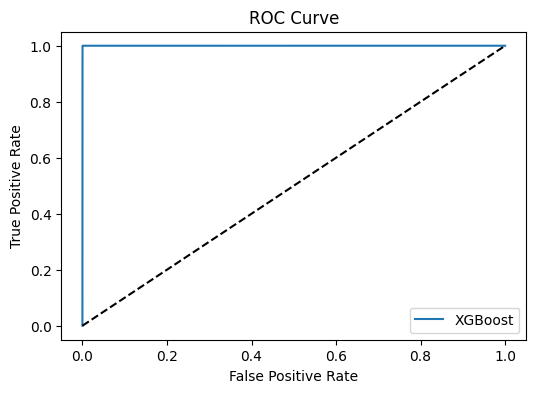

In [84]:
# Step 6: Visualization of Model Performance
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


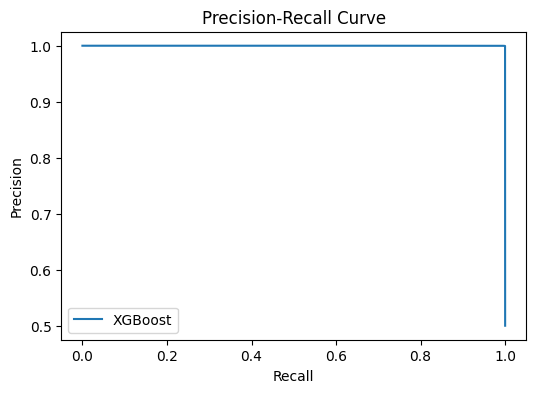

In [85]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


C:\Users\skandlam\AppData\Local\Temp\ipykernel_17596\3306369972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette=colors)


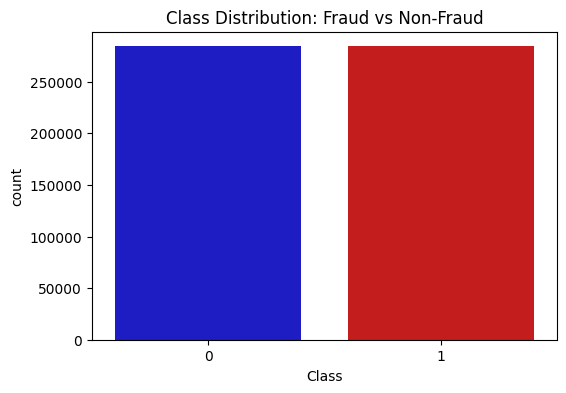

In [95]:
# Step 2: Exploratory Data Analysis (EDA)
colors=["#0101DF","#DF0101"]
# Plot the distribution of the 'Class' column to check the imbalance of classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.show()
